In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
path = '20250107_N2_NH3/'
file = os.listdir(path)

dfs = []
for f in file[5:81]:
    dfs.append(pd.read_csv(path+f, index_col='Time'))    
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(9348, 2048)


,49.750000,50.250000,50.750000,51.250000,51.760000,52.260000,52.760000,53.260000,53.760000,54.260000,...,1186.380000,1186.990000,1187.590000,1188.200000,1188.810000,1189.410000,1190.020000,1190.630000,1191.240000,1191.840000
0,-41.0,-29.0,12.0,5.0,19.0,28.0,-6.0,-2.0,2.0,-19.0,...,-21.0,-13.0,-9.0,2.0,4.0,60.0,-4.0,-18.0,-28.0,-17.0
1,-36.0,-15.0,30.0,-9.0,21.0,33.0,-3.0,-1.0,5.0,-28.0,...,-15.0,-12.0,-11.0,2.0,11.0,53.0,-12.0,-16.0,-25.0,-6.0
2,-39.0,-18.0,2.0,0.0,12.0,25.0,3.0,-12.0,-7.0,-26.0,...,-25.0,2.0,-20.0,-7.0,0.0,45.0,-13.0,-28.0,-13.0,-7.0
3,-36.0,-19.0,15.0,5.0,25.0,25.0,-1.0,-11.0,-9.0,-19.0,...,-21.0,-4.0,-24.0,2.0,0.0,36.0,-11.0,-33.0,-27.0,-7.0
4,-47.0,-20.0,17.0,2.0,1.0,29.0,4.0,-13.0,-9.0,-25.0,...,-24.0,1.0,-22.0,-1.0,5.0,26.0,-18.0,-24.0,-22.0,9.0


In [105]:
def DropFromSecond(x):
    x = x * 100
    x = np.floor(x)
    return x/100

# Given the spectrometer measures 200 - 1100 nn, drop columns outside this range
# df = df[df.columns[296:]]
new_col = [str(DropFromSecond(x)) for x in df.columns.astype(float)]
df.columns = new_col
df.index = [0.6*i for i in range(len(df.index))]
df.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
0.0,-41.0,-29.0,12.0,5.0,19.0,28.0,-6.0,-2.0,2.0,-19.0,...,-21.0,-13.0,-9.0,2.0,4.0,60.0,-4.0,-18.0,-28.0,-17.0
0.6,-36.0,-15.0,30.0,-9.0,21.0,33.0,-3.0,-1.0,5.0,-28.0,...,-15.0,-12.0,-11.0,2.0,11.0,53.0,-12.0,-16.0,-25.0,-6.0
1.2,-39.0,-18.0,2.0,0.0,12.0,25.0,3.0,-12.0,-7.0,-26.0,...,-25.0,2.0,-20.0,-7.0,0.0,45.0,-13.0,-28.0,-13.0,-7.0
1.8,-36.0,-19.0,15.0,5.0,25.0,25.0,-1.0,-11.0,-9.0,-19.0,...,-21.0,-4.0,-24.0,2.0,0.0,36.0,-11.0,-33.0,-27.0,-7.0
2.4,-47.0,-20.0,17.0,2.0,1.0,29.0,4.0,-13.0,-9.0,-25.0,...,-24.0,1.0,-22.0,-1.0,5.0,26.0,-18.0,-24.0,-22.0,9.0


In [153]:
# extact 20, 40 and 60 cycles
c20 = df[(df.index >= 1690) & (df.index <=1780)]
c40 = df[(df.index >= 3410) & (df.index <=3500)]
c60 = df[(df.index >= 5130) & (df.index <=5220)]
c20.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
1690.2,-35.0,-27.0,-12.0,18.0,5.0,39.0,2.0,7.0,5.0,-37.0,...,-16.0,-11.0,-15.0,-4.0,-8.0,44.0,-10.0,-35.0,-19.0,-10.0
1690.8,-36.0,-31.0,3.0,9.0,13.0,48.0,-15.0,-4.0,-16.0,-31.0,...,-12.0,-23.0,-7.0,-4.0,-4.0,51.0,-17.0,-20.0,-29.0,-9.0
1691.4,-37.0,-20.0,7.0,22.0,7.0,44.0,1.0,-4.0,-12.0,-30.0,...,-25.0,6.0,-8.0,-5.0,-3.0,44.0,-2.0,-29.0,-19.0,-10.0
1692.0,-47.0,-24.0,15.0,-2.0,13.0,26.0,-3.0,6.0,8.0,-28.0,...,-16.0,-1.0,-19.0,-13.0,-15.0,51.0,-24.0,-28.0,-27.0,-20.0
1692.6,-45.0,-26.0,-6.0,7.0,3.0,34.0,3.0,-8.0,4.0,-36.0,...,-32.0,13.0,-23.0,-23.0,8.0,29.0,-18.0,-16.0,-28.0,-4.0


In [173]:
c40.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
3410.4,0.0,0.0,0.0,5.0,10.0,39.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0
3411.0,0.0,0.0,9.0,0.0,24.0,38.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0
3411.6,0.0,0.0,9.0,23.0,15.0,36.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0
3412.2,0.0,0.0,12.0,11.0,10.0,36.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,1.0
3412.8,0.0,0.0,0.0,11.0,7.0,38.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0


In [174]:
c60.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
5130.0,0.0,0.0,9.0,0.0,14.0,42.0,1.0,0.0,1.0,0.0,...,0.0,10.0,0.0,2.0,3.0,41.0,1.0,0.0,0.0,0.0
5130.6,0.0,0.0,21.0,17.0,11.0,29.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,53.0,0.0,0.0,0.0,0.0
5131.2,0.0,0.0,7.0,6.0,6.0,35.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,6.0,0.0,50.0,0.0,0.0,0.0,0.0
5131.8,0.0,0.0,0.0,8.0,22.0,32.0,4.0,0.0,12.0,0.0,...,0.0,0.0,0.0,0.0,4.0,47.0,0.0,0.0,0.0,0.0
5132.4,0.0,0.0,3.0,15.0,16.0,40.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,2.0,3.0,58.0,0.0,0.0,0.0,0.0


In [164]:
c20_log = c20.copy()
c40_log = c40.copy()
c60_log = c60.copy()

x_20 = [0.6*i for i in range(len(c20.index))]
y_20 = c20.columns.tolist()
x_40 = [0.6*i for i in range(len(c40.index))]
y_40 = c40.columns.tolist()
x_60 = [0.6*i for i in range(len(c60.index))]
y_60 = c60.columns.tolist()

# absolute
for i in range(len(c20.index)):
    for j in range(len(c20.columns)):
        if c20.iloc[i,j]<0:
            c20.iloc[i,j]=0
# log
for i in range(len(c20_log.index)):
    for j in range(len(c20.columns)):
        if c20_log.iloc[i,j]<=1:
            c20_log.iloc[i,j]=0
        else:
            c20_log.iloc[i,j] = np.log(c20_log.iloc[i,j])

# absolute
for i in range(len(c40.index)):
    for j in range(len(c40.columns)):
        if c40.iloc[i,j]<0:
            c40.iloc[i,j]=0
# log
for i in range(len(c40_log.index)):
    for j in range(len(c40.columns)):
        if c40_log.iloc[i,j]<=1:
            c40_log.iloc[i,j]=0
        else:
            c40_log.iloc[i,j] = np.log(c40_log.iloc[i,j])

# absolute
for i in range(len(c60.index)):
    for j in range(len(c60.columns)):
        if c60.iloc[i,j]<0:
            c60.iloc[i,j]=0
# log
for i in range(len(c60_log.index)):
    for j in range(len(c60.columns)):
        if c60_log.iloc[i,j]<=1:
            c60_log.iloc[i,j]=0
        else:
            c60_log.iloc[i,j] = np.log(c60_log.iloc[i,j])

C:\Users\syj43\AppData\Local\Temp\ipykernel_3736\460846594.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [168]:
# scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(np.array(c20_log.columns).reshape(-1, 1))
y_20 = mm.transform(np.array(c20_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

mm = MinMaxScaler()
mm.fit(np.array(c40_log.columns).reshape(-1, 1))
y_40 = mm.transform(np.array(c40_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

mm = MinMaxScaler()
mm.fit(np.array(c60_log.columns).reshape(-1, 1))
y_60 = mm.transform(np.array(c60_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

In [169]:
X_20, Y_20 = np.meshgrid(x_20, y_20)
Z_20 = c20_log.T

X_40, Y_40 = np.meshgrid(x_40, y_40)
Z_40 = c40_log.T

X_60, Y_60 = np.meshgrid(x_60, y_60)
Z_60 = c60_log.T

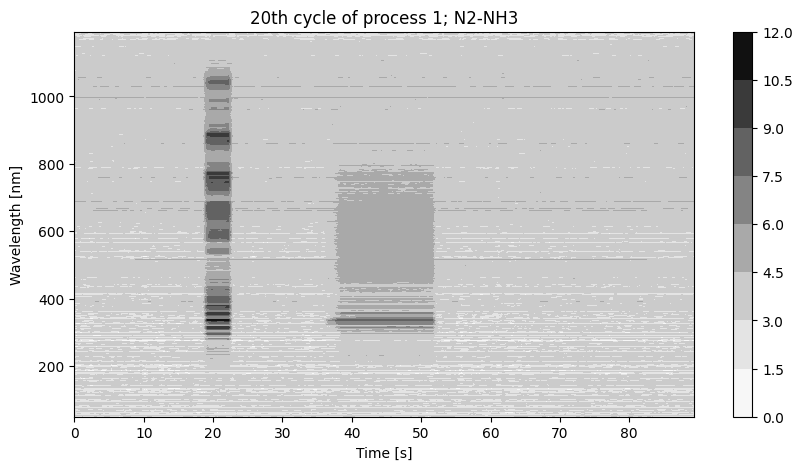

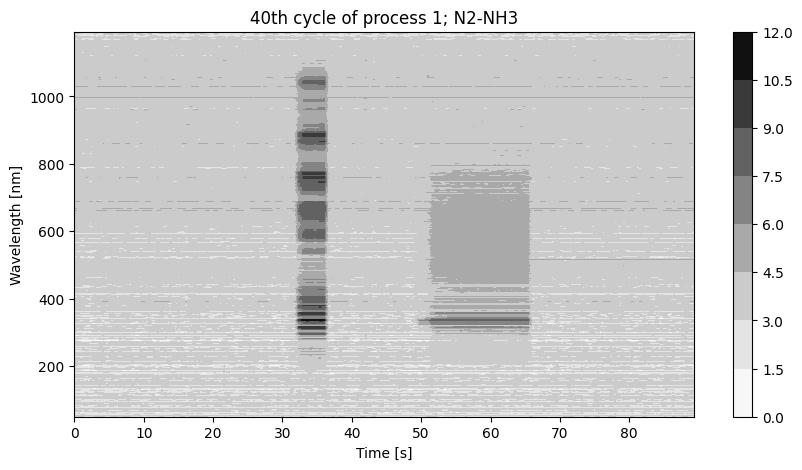

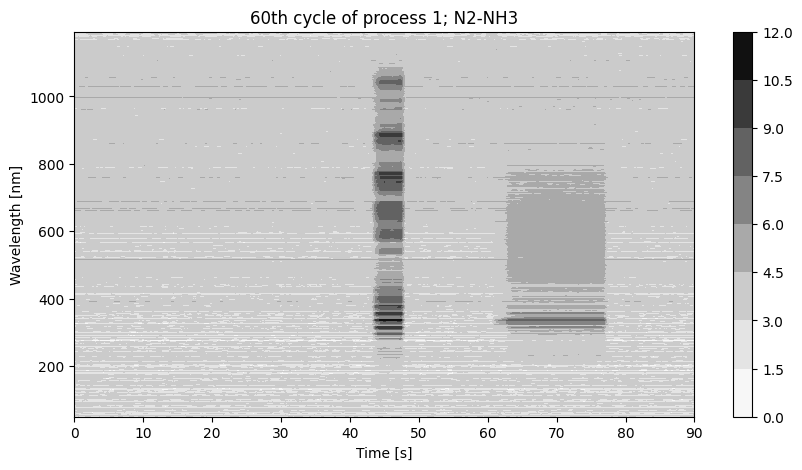

In [170]:
plt.figure(figsize=(10,5))
plt.contourf(X_20, Y_20, Z_20, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('20th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_40, Y_40, Z_40, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('40th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_60, Y_60, Z_60, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('60th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

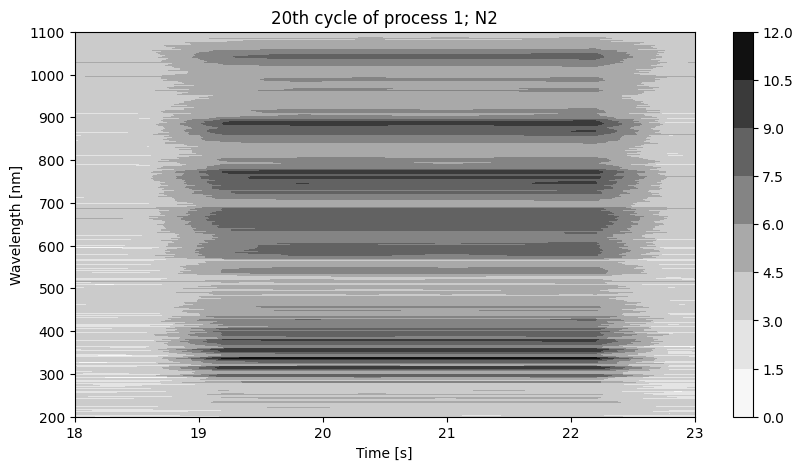

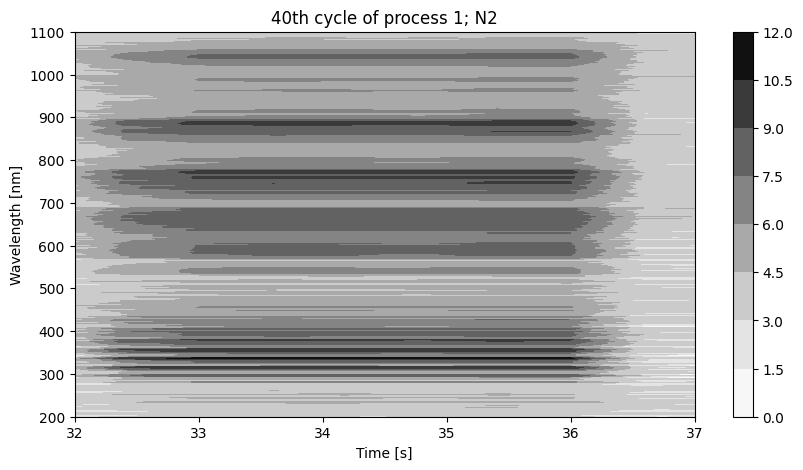

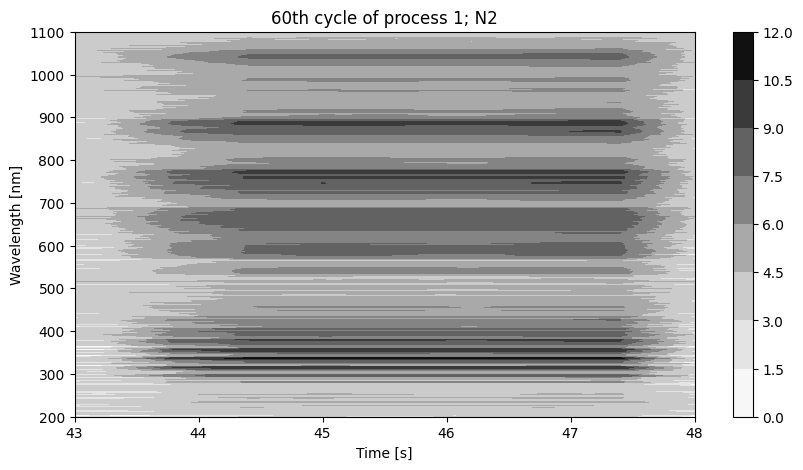

In [175]:
#N2
plt.figure(figsize=(10,5))
plt.contourf(X_20, Y_20, Z_20, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(18,23) # 5s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('20th cycle of process 1; N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_40, Y_40, Z_40, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(32,37) # 5s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('40th cycle of process 1; N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_60, Y_60, Z_60, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(43,48) # 5s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('60th cycle of process 1; N2')
plt.colorbar()
plt.show()

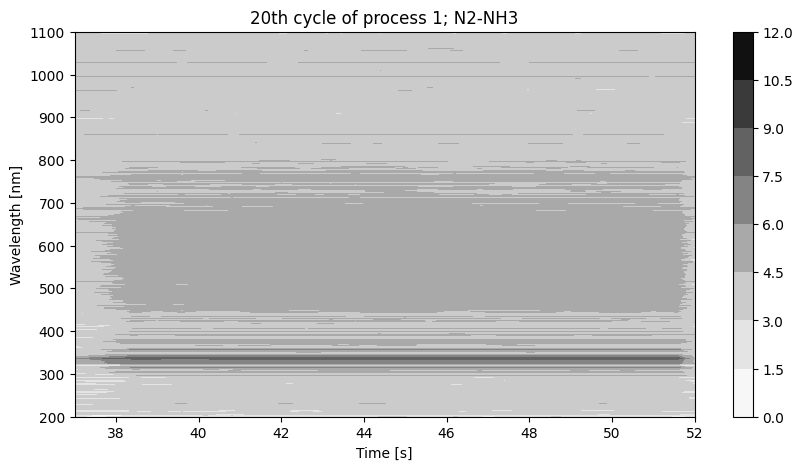

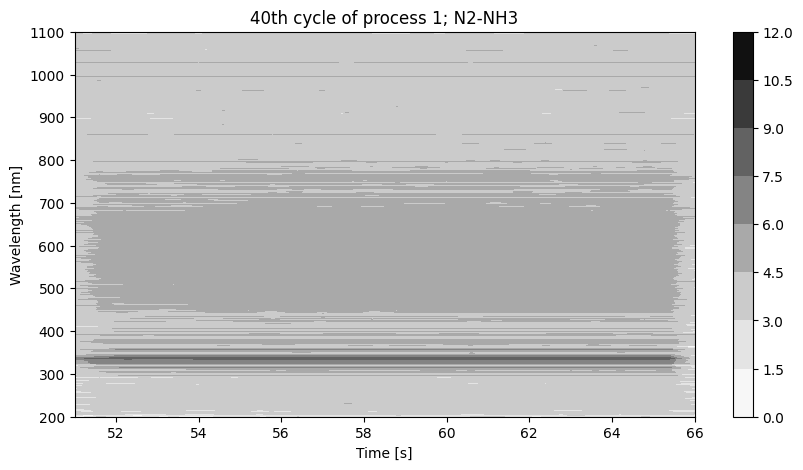

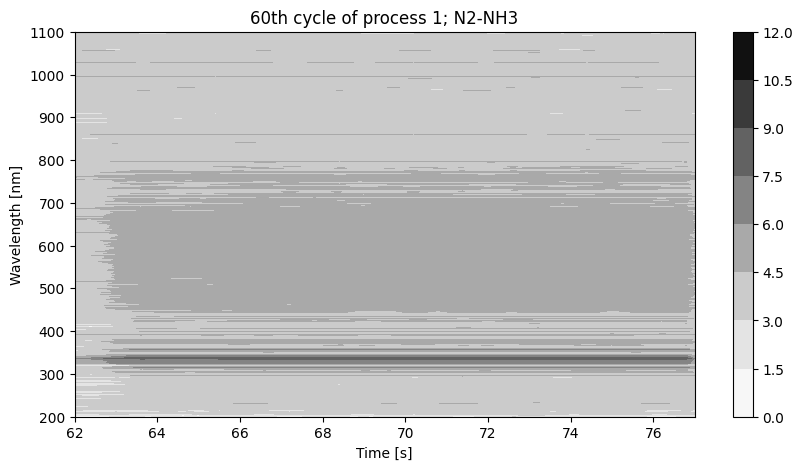

In [178]:
#NH3

plt.figure(figsize=(10,5))
plt.contourf(X_20, Y_20, Z_20, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(37,52) # 15s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('20th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_40, Y_40, Z_40, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(51,66) # 15s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('40th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_60, Y_60, Z_60, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(62,77) # 15s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('60th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

In [179]:
c20_start = 1690.2
c20_N2 = c20[(c20.index>=c20_start+19)&(c20.index<=c20_start+22)]
c20_NH3 = c20[(c20.index>=c20_start+38)&(c20.index<=c20_start+52)]

c40_start = 3410.4
c40_N2 = c40[(c40.index>=c40_start+32)&(c40.index<=c40_start+36)]
c40_NH3 = c40[(c40.index>=c40_start+51)&(c40.index<=c40_start+66)]

c60_start = 5130.0
c60_N2 = c60[(c60.index>=c60_start+44)&(c60.index<=c60_start+47)]
c60_NH3 = c60[(c60.index>=c60_start+62)&(c60.index<=c60_start+77)]

In [126]:
c20_N2

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
1709.4,0.0,0.0,3.0,3.0,23.0,43.0,0.0,4.0,6.0,0.0,...,0.0,0.0,0.0,0.0,13.0,51.0,0.0,0.0,0.0,10.0
1710.0,0.0,0.0,1.0,9.0,5.0,38.0,0.0,4.0,0.0,0.0,...,0.0,1.0,0.0,11.0,11.0,34.0,0.0,0.0,0.0,0.0
1710.6,0.0,0.0,27.0,1.0,9.0,43.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,11.0,54.0,0.0,0.0,0.0,4.0
1711.2,0.0,0.0,3.0,0.0,21.0,26.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,4.0,53.0,2.0,0.0,0.0,0.0
1711.8,0.0,0.0,27.0,6.0,18.0,26.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,7.0,0.0,55.0,17.0,0.0,0.0,0.0


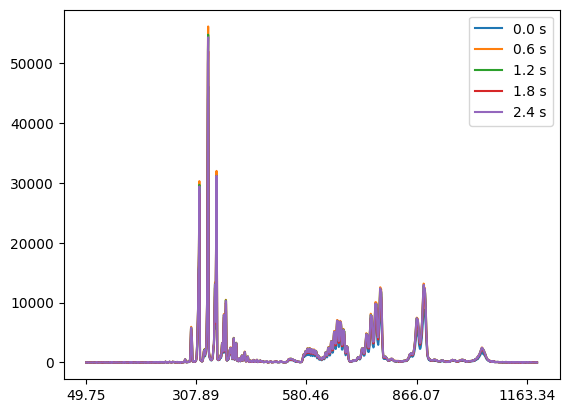

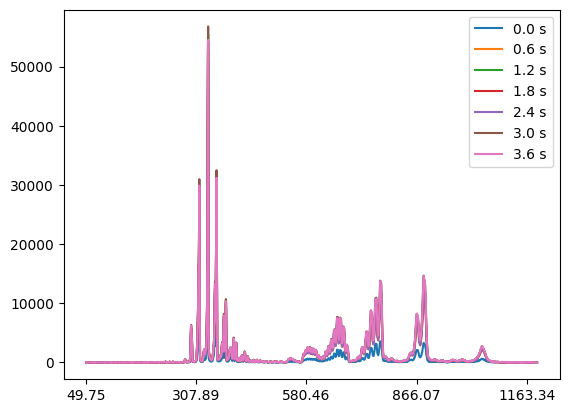

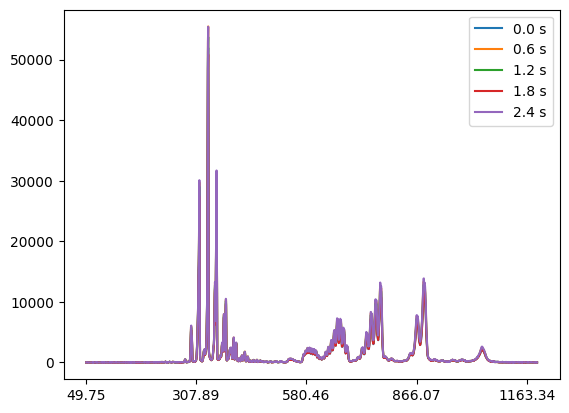

In [180]:
c20_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c20_N2))]
c20_N2.T.plot(kind='line')
plt.show()

c40_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_N2))]
c40_N2.T.plot(kind='line')
plt.show()

c60_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c60_N2))]
c60_N2.T.plot(kind='line')
plt.show()

In [181]:
c20_log_N2 = c20_log[(c20_log.index>=c20_start+19)&(c20_log.index<=c20_start+22)]
c20_log_NH3 = c20_log[(c20_log.index>=c20_start+38)&(c20_log.index<=c20_start+52)]

c40_log_N2 = c40_log[(c40_log.index>=c40_start+32)&(c40_log.index<=c40_start+36)]
c40_log_NH3 = c40_log[(c40_log.index>=c40_start+51)&(c40_log.index<=c40_start+66)]

c60_log_N2 = c60_log[(c60_log.index>=c60_start+44)&(c60_log.index<=c60_start+47)]
c60_log_NH3 = c60_log[(c60_log.index>=c60_start+62)&(c60_log.index<=c60_start+77)]

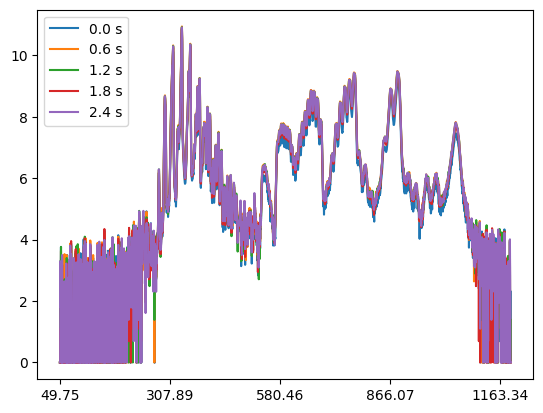

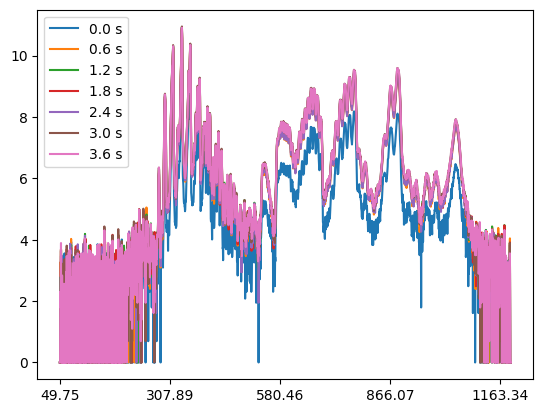

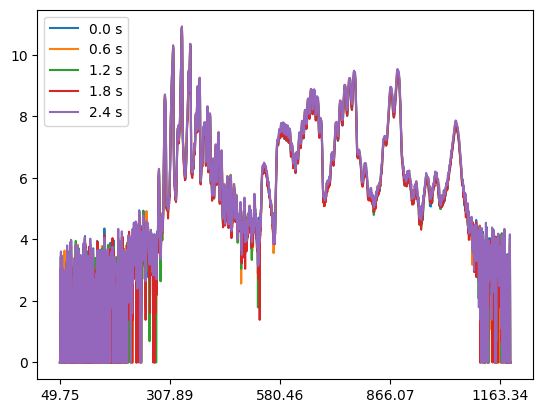

In [182]:
c20_log_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c20_log_N2))]
c20_log_N2.T.plot(kind='line')
plt.show()

c40_log_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_log_N2))]
c40_log_N2.T.plot(kind='line')
plt.show()

c60_log_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c60_log_N2))]
c60_log_N2.T.plot(kind='line')
plt.show()

In [185]:
c_N2_absolute

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
1.2 s,0.0,0.0,27.0,1.0,9.0,43.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,11.0,54.0,0.0,0.0,0.0,4.0


In [196]:
# get the plot at 1.2s
c_N2_absolute = pd.concat([c20_N2[c20_N2.index=='1.2 s'], c40_N2[c40_N2.index=='1.8 s'], c60_N2[c60_N2.index=='1.2 s']])
c_N2_absolute.index = [20,40,60] # refers to cycles
c_N2_log = pd.concat([c20_log_N2[c20_log_N2.index=='1.2 s'], c40_log_N2[c40_log_N2.index=='1.8 s'], c60_log_N2[c60_log_N2.index=='1.2 s']])
c_N2_log.index = [20,40,60] # refers to cycles

In [192]:
c_N2_absolute

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
20,0.0,0.0,27.0,1.0,9.0,43.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,11.0,54.0,0.0,0.0,0.0,4.0
40,0.0,0.0,10.0,0.0,15.0,38.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,50.0,0.0,0.0,0.0,0.0
60,0.0,0.0,12.0,5.0,12.0,33.0,3.0,2.0,0.0,0.0,...,0.0,14.0,0.0,0.0,0.0,57.0,5.0,0.0,0.0,0.0


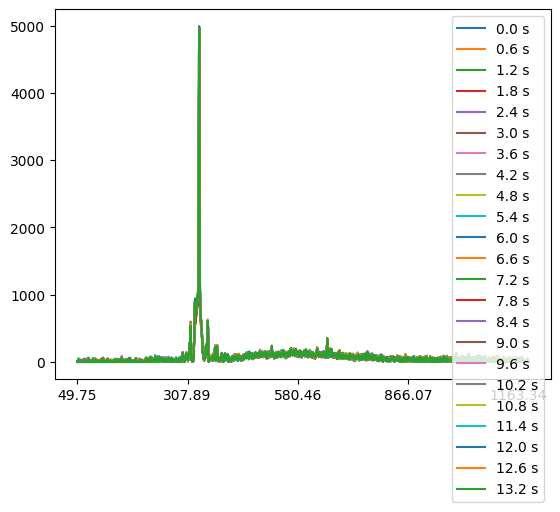

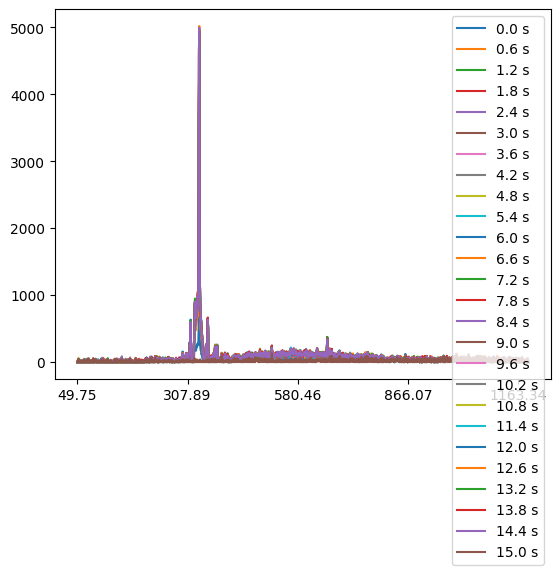

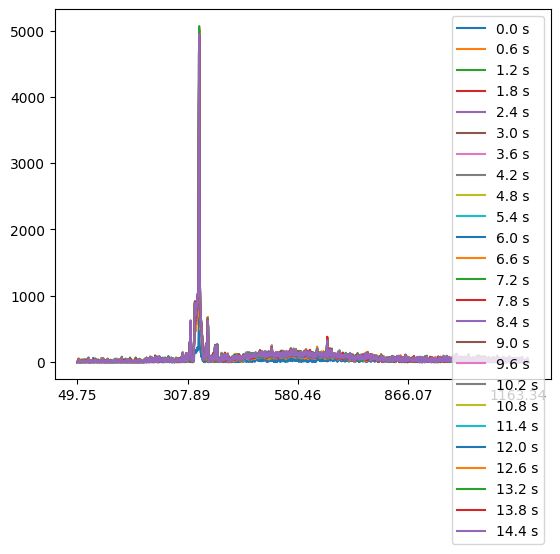

In [193]:
c20_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c20_NH3))]
c20_NH3.T.plot(kind='line')
plt.show()

c40_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_NH3))]
c40_NH3.T.plot(kind='line')
plt.show()

c60_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c60_NH3))]
c60_NH3.T.plot(kind='line')
plt.show()

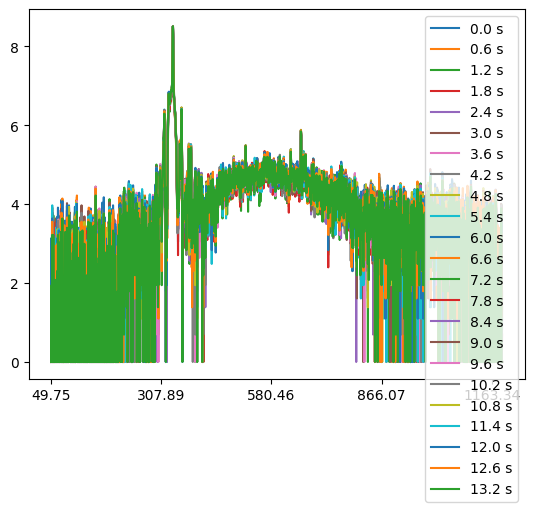

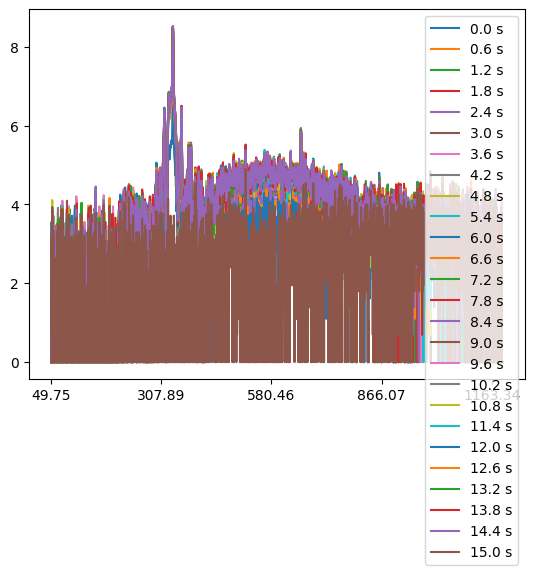

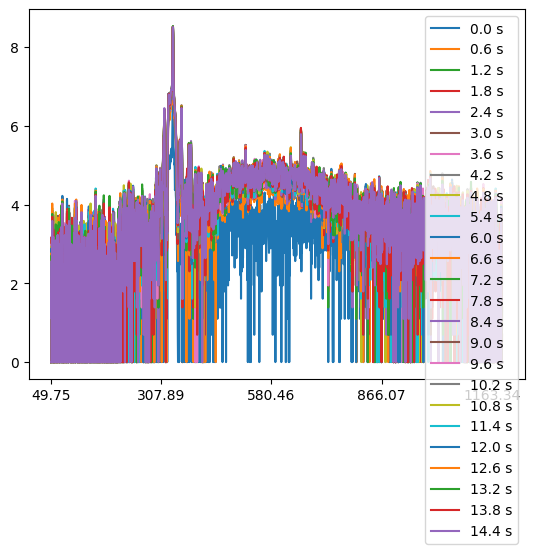

In [194]:
c20_log_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c20_log_NH3))]
c20_log_NH3.T.plot(kind='line')
plt.show()

c40_log_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_log_NH3))]
c40_log_NH3.T.plot(kind='line')
plt.show()

c60_log_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c60_log_NH3))]
c60_log_NH3.T.plot(kind='line')
plt.show()

In [195]:
# save NH3 at 6.6s
c_NH3_absolute = pd.concat([c20_NH3[c20_NH3.index=='6.6 s'], c40_NH3[c40_NH3.index=='7.2 s'], c60_NH3[c60_NH3.index=='7.2 s']])
c_NH3_log = pd.concat([c20_log_NH3[c20_log_NH3.index=='6.6 s'], c40_log_NH3[c40_log_NH3.index=='7.2 s'], c60_log_NH3[c60_log_NH3.index=='7.2 s']])

c_NH3_absolute.index = [20,40,60] # refers the 20th cycle
c_NH3_log.index = [20,40,60]
c_NH3_absolute

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
20,0.0,0.0,10.0,0.0,1.0,35.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,6.0,41.0,9.0,0.0,0.0,0.0
40,0.0,0.0,0.0,3.0,4.0,47.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,1.0,0.0,52.0,0.0,0.0,0.0,0.0
60,0.0,0.0,3.0,4.0,21.0,37.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,6.0,42.0,0.0,0.0,0.0,0.0


In [248]:
# random color generator
import random
random.seed(42)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(6)]

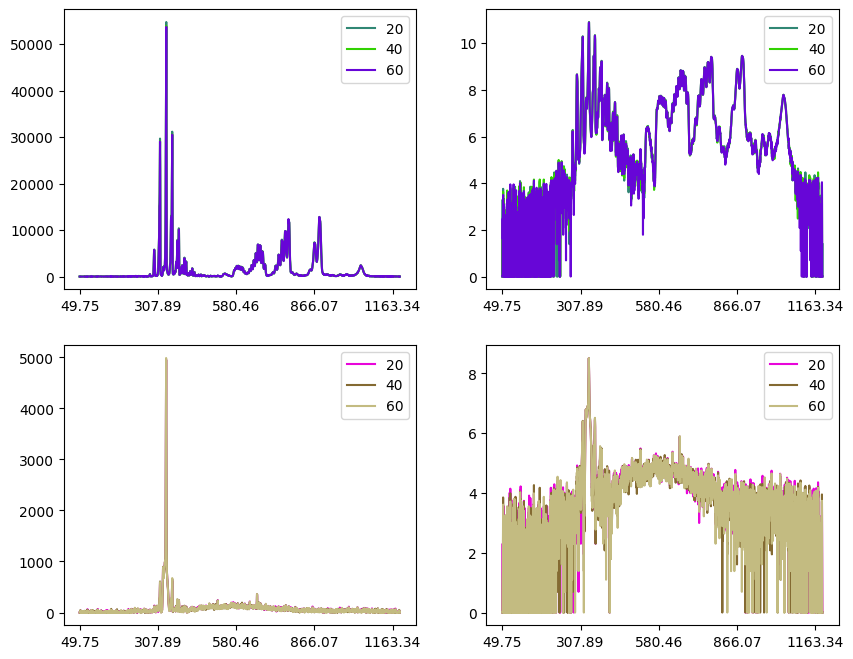

In [249]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
c_N2_absolute.T.plot(kind='line', ax=axs[0,0],color=colors[:3])
c_N2_log.T.plot(kind='line', ax=axs[0,1], color=colors[:3])
c_NH3_absolute.T.plot(kind='line',ax=axs[1,0], color=colors[3:])
c_NH3_log.T.plot(kind='line',ax=axs[1,1], color=colors[3:])
plt.show()

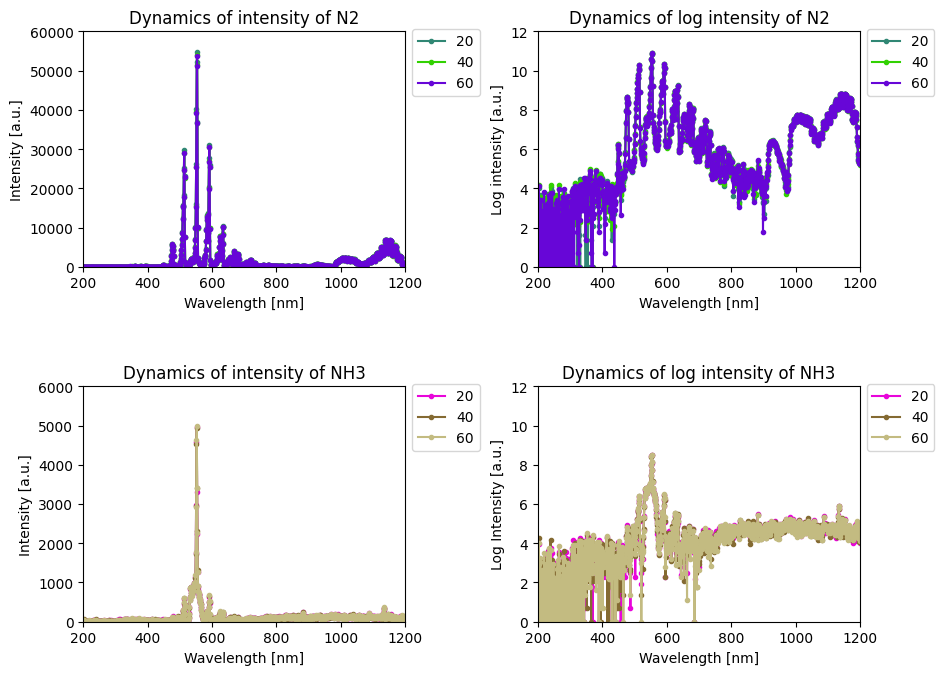

In [258]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
fig.tight_layout(pad=6.5)
for i in range(3):
    axs[0,0].plot(c_N2_absolute.values.tolist()[i],'.-',color=colors[i])
    axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
    axs[0,0].set(xlim=(200,1200), ylim=(0,60000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='Dynamics of intensity of N2')
    axs[0,1].plot(c_N2_log.values.tolist()[i],'.-',color=colors[i])
    axs[0,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
    axs[0,1].set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log intensity [a.u.]', title='Dynamics of log intensity of N2')
    axs[1,0].plot(c_NH3_absolute.values.tolist()[i],'.-',color=colors[3+i])
    axs[1,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
    axs[1,0].set(xlim=(200,1200), ylim=(0,6000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='Dynamics of intensity of NH3')
    axs[1,1].plot(c_NH3_log.values.tolist()[i],'.-',color=colors[3+i])
    axs[1,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
    axs[1,1].set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log Intensity [a.u.]', title='Dynamics of log intensity of NH3')
plt.show()

In [260]:
fig.savefig('process1_dynamics.png')

No significant differences in a change of intensity with cycles observed.

In [ ]:
# make them interactive
